# K-fold cross-validation & confusion matrices 
* unsupervised clustering algorithm
* where you know how many clusters areappropriate
### K-means metod
* Setting up for clustering analysis

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [8]:
%matplotlib inline
plt.figure(figsize = (7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [9]:
iris = datasets.load_iris()

x = scale(iris.data)
y = pd.DataFrame(iris.target)

variable_numes=iris.feature_names
x[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

### Building and running model 

In [10]:
clustering = KMeans(n_clusters =3, random_state = 5)
clustering.fit(x)

# KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
#       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
#       random_state=5, tol=0.0001, verbose=0)

KMeans(n_clusters=3, random_state=5)

### Plotting model outputs

In [11]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y.columns = ['Targets']


Text(0.5, 1.0, 'K-Means Classification')

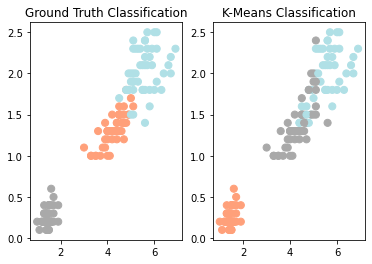

In [13]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y = iris_df.Petal_Width, c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y = iris_df.Petal_Width, c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification')



Text(0.5, 1.0, 'K-Means Classification')

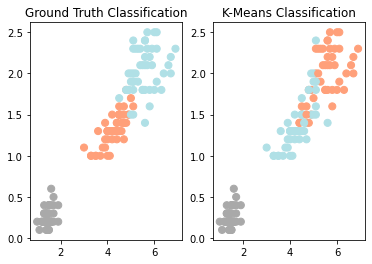

In [20]:
color_theme = np.array(['darkgray','lightsalmon','powderblue'])
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length, y = iris_df.Petal_Width, c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length, y = iris_df.Petal_Width, c=color_theme[relabel],s=50)
plt.title('K-Means Classification')


### Evaluate you clustering results

In [21]:
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.23      0.22      0.23        50
           2       0.26      0.28      0.27        50

    accuracy                           0.50       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.50      0.50      0.50       150



####
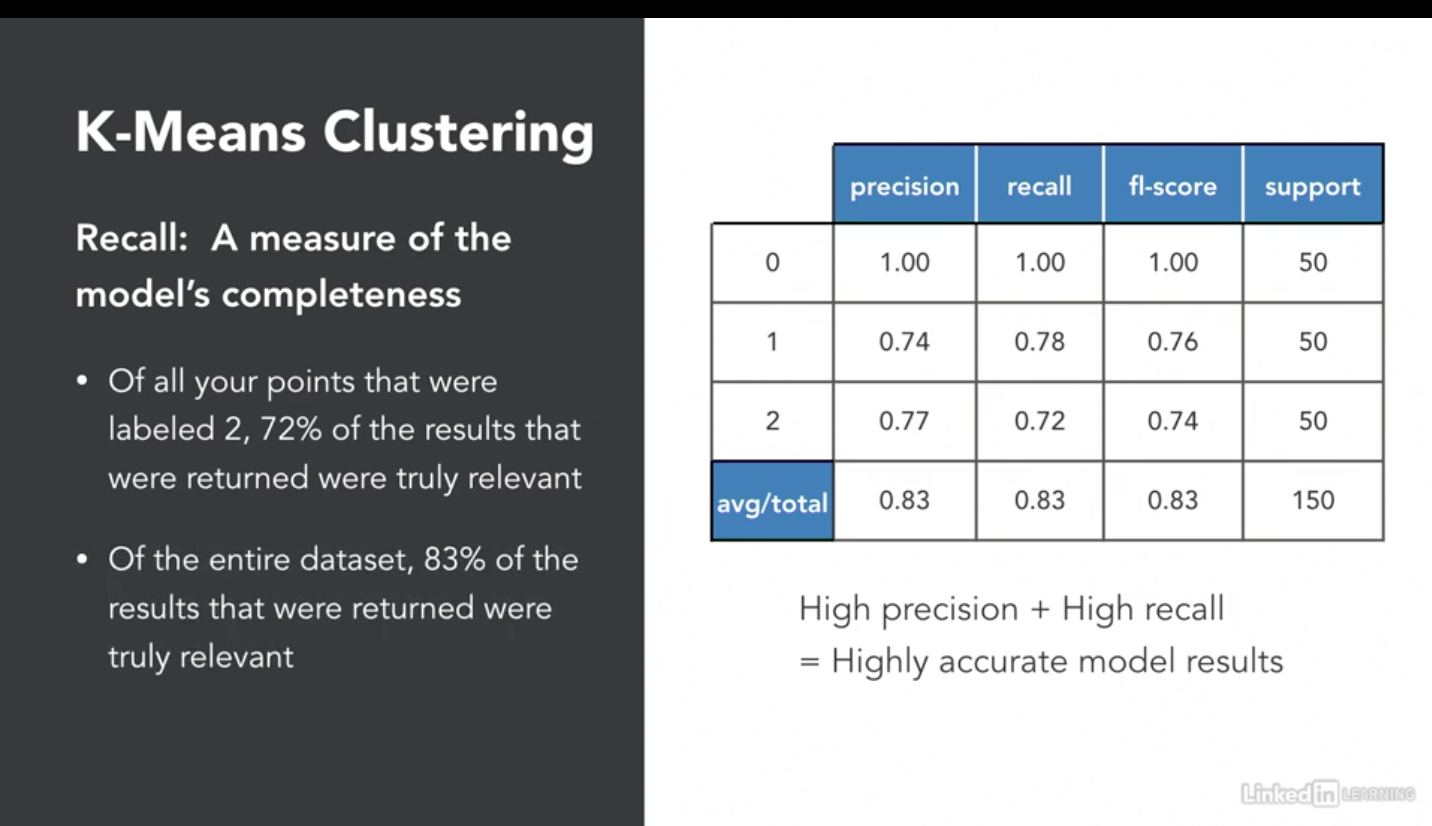

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
import sklearn.metrics as sm

from sklearn.cluster import AgglomerativeClustering

import scipy

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet

from scipy.spatial.distance import pdist

In [24]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10, 3))
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [26]:
address = 'D:\School/underGrad-School/LinkedIn_DataScience/Exercise Files-Part2/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars[['mpg', 'disp', 'hp', 'wt']].values

y = cars.iloc[:,(9)].values

### Using scipy to generate dendrograms

In [27]:
Z = linkage(X, 'ward')

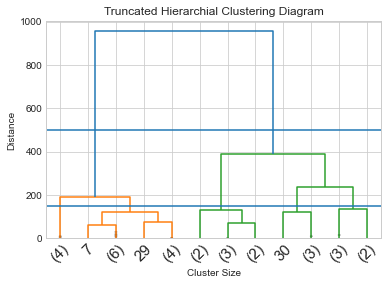

In [28]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation =45, leaf_font_size =15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)
plt.show()

### Generating hierarchical clusters

In [29]:
k=2

Hclustering =AgglomerativeClustering(n_clusters = k, affinity = 'euclidean',linkage = 'ward')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [30]:
Hclustering =AgglomerativeClustering(n_clusters = k, affinity = 'euclidean',linkage = 'average')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

0.78125

In [31]:
Hclustering =AgglomerativeClustering(n_clusters = k, affinity = 'manhattan',linkage = 'average')
Hclustering.fit(X)

sm.accuracy_score(y,Hclustering.labels_)

0.71875

In [32]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [33]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

### Train your model and identify outliers 

In [35]:
# with this example, we're going to use the same data that we used for the rest of this chapter. So we're going to copy and 
# paste in the code. 
address = 'D:\School/underGrad-School/LinkedIn_DataScience/Exercise Files-Part2/Data/iris.data.csv'
df = pd.read_csv(address, header=None, sep=',')

df.columns=['Sepal Length','Sepal Width','Petal Length','Petal Width', 'Species']

data = df.iloc[:,0:4].values
target = df.iloc[:,4].values
# target is last column 'Species'
df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
model = DBSCAN(eps=0.8,  min_samples=19).fit(data)
print(model)                                            
# each have min 19 samples
# max distance is 0.8, which can be concidered as neigboahood

DBSCAN(eps=0.8, min_samples=19)


In [37]:
# Visualize results

outliers_df = pd.DataFrame(data)

print(Counter(model.labels_))

print(outliers_df[model.labels_ ==-1])

Counter({1: 94, 0: 50, -1: 6})
       0    1    2    3
98   5.1  2.5  3.0  1.1
105  7.6  3.0  6.6  2.1
117  7.7  3.8  6.7  2.2
118  7.7  2.6  6.9  2.3
122  7.7  2.8  6.7  2.0
131  7.9  3.8  6.4  2.0


####
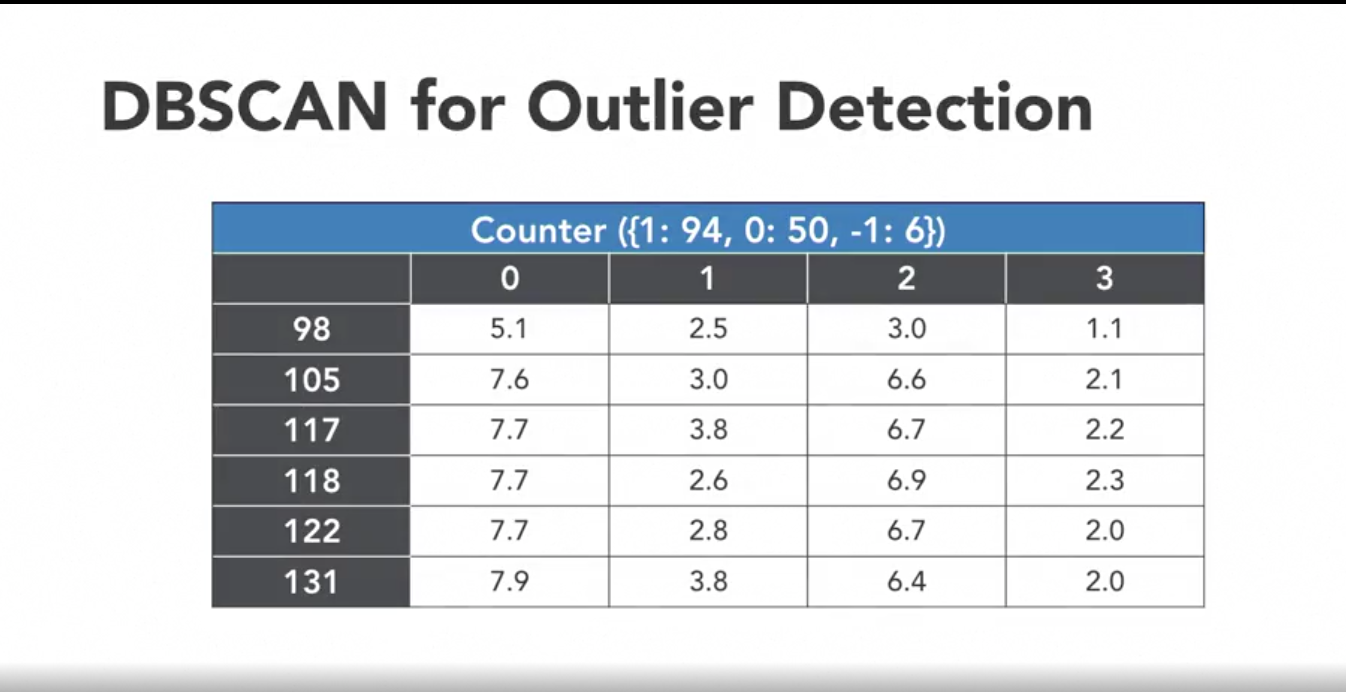

Text(0.5, 1.0, 'DBSCAN fro Outlier Dectection')

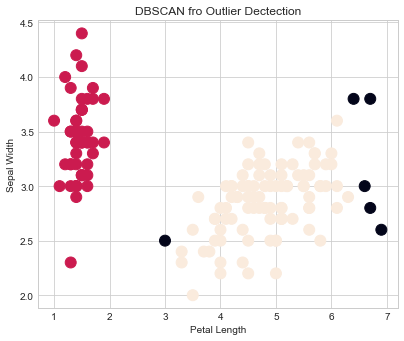

In [38]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
colors = model.labels_

ax.scatter(data[:,2],data[:,1], c = colors, s=120)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')

plt.title('DBSCAN fro Outlier Dectection')

In [39]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.decomposition import FactorAnalysis

from sklearn import datasets

In [40]:
iris = datasets.load_iris()
    
X= iris.data
variable_names = iris.feature_names

X[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [41]:
factor = FactorAnalysis().fit(X)

DF = pd.DataFrame(factor.components_, columns = variable_names)
print(DF)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


### Principal component analysis(PCA) 

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb

from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import datasets

In [43]:
from sklearn import decomposition
from sklearn.decomposition import PCA


In [44]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [45]:
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names
X[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [46]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.9246, 0.0531, 0.0171, 0.0052])

In [47]:
pca.explained_variance_ratio_.sum()

1.0

In [48]:
comps = pd.DataFrame(pca.components_,columns = variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


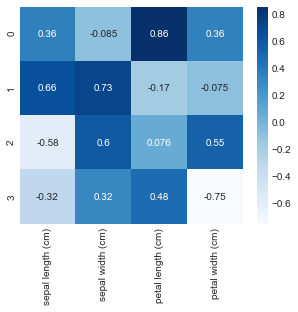

In [83]:
sb.heatmap(comps, cmap='Blues',annot = True)